In [1]:
import matplotlib.pyplot as plt
import numpy

# 로이터 뉴스 데이터셋 불러오기
from tensorflow import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras import utils

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tensorflow.set_random_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)
print(x_train.shape)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
(8982, 100)


In [2]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.3552 - loss: 2.8771 - val_accuracy: 0.4831 - val_loss: 2.0626
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.4776 - loss: 2.0278 - val_accuracy: 0.5414 - val_loss: 1.7910
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.5236 - loss: 1.7868 - val_accuracy: 0.5334 - val_loss: 1.7899
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 246ms/step - accuracy: 0.5494 - loss: 1.7206 - val_accuracy: 0.5570 - val_loss: 1.7260
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.5825 - loss: 1.6222 - val_accuracy: 0.6100 - val_loss: 1.5499
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.6286 - loss: 1.4842 - val_accuracy: 0.6233 - val_loss: 1.4972
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.6480 - loss: 1.3969 - val_accuracy: 0.6385 - val_loss: 1.4074
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.6691 - loss: 1.2887 - val_accu

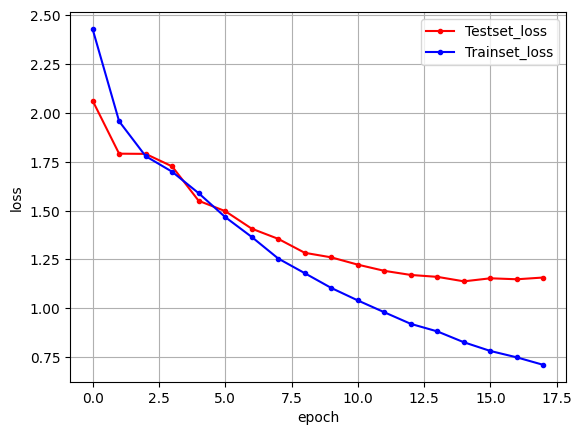

In [3]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
